### Run the following commands in the terminal before you start
source activate base

cd /Users/lphan/Documents/Spotify/spotify_dashboard

source bin/activate

jupyter lab

In [ ]:
import os
os.chdir('/Users/lphan/Documents/Spotify/spotify_dashboard')

In [46]:
# Packages
# For Cleaning and basic functions
import pandas as pd
import numpy as np
import requests
import json

# # Connecting to Spotify API
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials

# For Machine Learning
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#for visualizations and images pulling
from PIL import Image
import requests
from io import BytesIO
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('tabulator')
pn.extension(sizing_mode = 'stretch_width')
import plotly.io as pio
import hvplot.pandas
import holoviews as hv
# df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
# cache data to improve dashboard performance


In [47]:
#pip install matplotlib
#pip install wordcloud 
#pip install -U scikit-learn

In [10]:
#these are downloaded files from a separate cleaning job that we did
mood = "https://raw.githubusercontent.com/lphan1812/spotify-project/main/mood_data.csv"
user_six_mos = 'https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv'
user_audiofeature = 'https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_audio_features.csv'
user_genres = "https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_6mo_genres.csv"

In [11]:
mood_data = pd.read_csv(mood)
user_six_mos = pd.read_csv(user_six_mos)
user_audiofeature = pd.read_csv(user_audiofeature)
user_genres = pd.read_csv(user_genres)
# singer-songerwriter is not necessarily a genre
user_genres = user_genres[~(user_genres['genres'] == 'singer-songwriter')]


In [12]:
mood_data

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity,album_release_date,vibe
0,0,Miley Cyrus,Flowers,Flowers,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,...,0.000005,0.0322,0.646,117.999,200455,4,0.06320,98,1/13/23,upbeat
1,1,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,...,0.000669,0.1140,0.802,106.999,239318,4,0.38200,95,8/25/22,upbeat
2,2,David Guetta,I'm Good (Blue),I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,0.561,0.965,7,-3.673,0,...,0.000007,0.3710,0.304,128.040,175238,4,0.00383,94,8/26/22,upbeat
3,3,Stephen Sanchez,Until I Found You (Em Beihold Version),Until I Found You (with Em Beihold) - Em Beiho...,1Y3LN4zO1Edc2EluIoSPJN,0.551,0.550,10,-5.339,1,...,0.000000,0.2020,0.342,101.190,176440,3,0.77700,93,4/22/22,upbeat
4,4,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,0.704,0.797,0,-5.927,1,...,0.000745,0.0546,0.825,139.994,148486,4,0.08260,93,5/13/22,upbeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,2774,Joy Crookes,Don't Let Me Down (Demo),Don't Let Me Down - Demo,1VwPTHAfPvcL1ZubK6qabL,0.696,0.140,9,-11.509,1,...,0.000354,0.1480,0.203,80.831,195535,3,0.81800,54,11/29/18,chill
2775,2775,Lee Fields & The Expressions,My World,Honey Dove,1emxi7e5EWFsJmwSKTuUDH,0.487,0.497,4,-5.776,0,...,0.167000,0.1090,0.195,160.317,246573,4,0.12400,53,6/2/09,chill
2776,2776,Charlotte Day Wilson,ALPHA,Mountains,4JvEicQI7CxOJxuI0xtpim,0.540,0.399,10,-9.127,1,...,0.023900,0.3680,0.141,117.976,249334,4,0.77000,53,7/9/21,chill
2777,2777,Raveena,Shanti,Love Child,7xlhCrF1qme2kFUmynnaQq,0.907,0.338,7,-10.944,1,...,0.032200,0.0418,0.848,95.989,163072,4,0.45400,53,12/6/17,chill


## Train and test models to label mood to the user's playlist

In [13]:
# Drops NAs so it can be put into the sklearn model
mood_data = mood_data.dropna()
user_data = user_audiofeature.dropna()

### Logistic regression

In [15]:
# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a logistic regression model and train it
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

# make predictions on the user data
user_pred = logreg.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is:", accuracy)


The accuracy of the model is: 0.7230215827338129


### Random Forest --- Best model

In [164]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]
user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a random forest classifier and train it
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the user data
best_user_pred = rfc.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
best_y_pred = rfc.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_y_pred)
print("The accuracy of the model is:", best_accuracy)


The accuracy of the model is: 0.8165467625899281


### Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a decision tree classifier model and train it
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# make predictions on the user data
user_pred = dt.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the decision tree model is:", accuracy)


The accuracy of the decision tree model is: 0.7446043165467626


### Neural Networks

In [152]:
from sklearn.neural_network import MLPClassifier

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a neural network classifier model and train it
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
nn.fit(X_train, y_train)

# make predictions on the user data
user_pred = nn.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = nn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the neural network model is:", accuracy)


The accuracy of the neural network model is: 0.7859712230215827


In [165]:
### Calculate the proportion of different moods within the user's playlist

total = len(best_user_pred)
upbeat_count = np.count_nonzero(best_user_pred == 'upbeat')
upbeat_per = round((upbeat_count / total) * 100)

sad_count = np.count_nonzero(best_user_pred == 'sad')
sad_per = round((sad_count / total) * 100)

chill_count = np.count_nonzero(best_user_pred == 'chill')
chill_per = round((chill_count / total) * 100)

print("Upbeat percent:", upbeat_per, "%")
print("Sad percent:", sad_per , "%")
print("Chill percent:", chill_per, "%")

print("The accuracy of the model is:", best_accuracy)

Upbeat percent: 24 %
Sad percent: 37 %
Chill percent: 39 %
The accuracy of the model is: 0.8165467625899281


In [162]:
user_data['predicted_mood'] = best_user_pred

In [163]:
user_data

,track_uri,popularity,danceability,energy,loudness,valence,speechiness,instrumentalness,tempo,predicted_mood
0,4FFSK1xgCLkTZJLUERLZKG,61,0.712,0.440,-11.566,0.312,0.0413,0.000000,123.958,chill
1,5enxwA8aAbwZbf5qCHORXi,85,0.631,0.518,-8.771,0.205,0.0303,0.000000,93.023,upbeat
2,0T482F5L30d7ChNbLqsKa7,43,0.414,0.235,-15.252,0.137,0.0429,0.907000,144.467,sad
3,3EZTyh1wJEmreJH1aULPCj,62,0.323,0.106,-10.374,0.158,0.0323,0.000059,91.455,sad
4,5Mw9bXG1dLNhbjofkVS2oR,69,0.262,0.361,-10.187,0.056,0.0333,0.002680,126.786,sad
...,...,...,...,...,...,...,...,...,...,...
831,2cOUlop2ZakjOKe4WinesN,77,0.735,0.425,-6.648,0.848,0.0464,0.000000,85.896,upbeat
832,0k6LV1ohcK2hlNPwu1nVw9,63,0.641,0.512,-4.935,0.395,0.0285,0.000000,116.059,chill
833,6yhLR2sVn1IfsScVrR4ocr,60,0.416,0.341,-10.749,0.776,0.0391,0.000000,177.229,chill
834,4pbG9SUmWIvsROVLF0zF9s,74,0.490,0.715,-5.549,0.866,0.0476,0.000000,130.726,upbeat


### Get images that represent different moods and assign the appropriate cat to the user's data

In [159]:

# Define image URLs
upbeat_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/upbeat_img.jpg?raw=true'
sad_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/sad_img.jpg?raw=true'
chill_image_url = 'https://github.com/lphan1812/spotify-project/blob/main/chill_img.jpg?raw=true'
confused_url = 'https://github.com/lphan1812/spotify-project/blob/main/confused_cat.png?raw=true'

# Read images from URLs
response = requests.get(upbeat_image_url)
upbeat_image = Image.open(BytesIO(response.content))

response = requests.get(sad_image_url)
sad_image = Image.open(BytesIO(response.content))

response = requests.get(chill_image_url)
chill_image = Image.open(BytesIO(response.content))

response = requests.get(confused_url)
confused_image = Image.open(BytesIO(response.content))

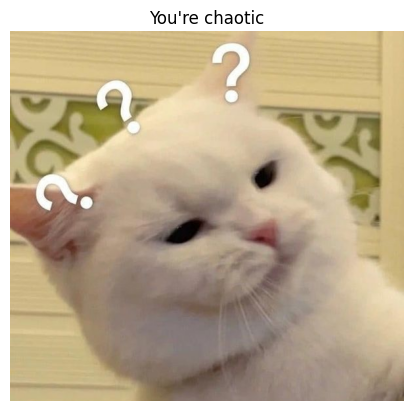

In [160]:
# Find the highest percentage
max_percent = max(upbeat_per, sad_per, chill_per)

style = {'font-family': 'Andale Mono','font-size': '10px'}
# Find the highest percentage category
max_per = max(upbeat_per, sad_per, chill_per)
if (upbeat_per < 50 and sad_per <50 and chill_per < 50): 
    image_file = confused_image
    category = 'chaotic'
    punchline = pn.pane.Markdown("# Jeez.. your moods are all over the place. Happy. Chill. Emo. Whatever. Just pick one!",style=style)
elif max_per == upbeat_per:
    image_file = upbeat_image
    category = 'upbeat'
    punchline = pn.pane.Markdown("# Congratulations, you're not depressed!!!",style=style)
elif max_per == sad_per:
    image_file = sad_image
    category = 'sad'
    punchline = pn.pane.Markdown("# LMAO who hurt you?",style=style)
else:
    image_file = chill_image
    category = 'chill'
    punchline = pn.pane.Markdown("# Ah yes, the classic 'I'm so cool, I only listen to lo-fi beats vibe.' It's okay. Same here. We're chillin",style=style)

# Load and display the image
# image = plt.imread(image_file, format = None)
plt.imshow(image_file)
plt.axis('off')
plt.title(f"You're {category}")
plt.show()


In [161]:
punchline

Markdown(str, sizing_mode='stretch_width', style={'font-family': 'Andale Mo...})

# Create visualizations

In [29]:
## PREDEFINE COLOR CODE USED IN THE DASHBOARD
# the predefined are color provided by Spotiy
pre_defined_bgcolor = '#191414'
# "#d5e7e1"

pre_defined_green ='#1db954'
# '#2d856a'

titlecol ='#ffffff'
darkgray = '#212121'
midgray ='#535353'
lightgray ='#b3b3b3'
pale ='#d5e7e1'

# pre_defined_bgcolor ='#2d856a'
# predefineed_green = "#a2c3d1"

### Audio Features

In [31]:
my_features = mood_data[['danceability', 'energy', 'loudness','speechiness',
                             'valence', 'tempo', 'popularity']]

music_feature_me = pd.DataFrame(scaler.fit_transform(my_features), columns=my_features.columns)

In [32]:
#allow plotly to show up in jupyter lab
pio.renderers.default = 'iframe'

In [35]:
radarchart = go.Figure(data=go.Scatterpolar(
    r=list(round(music_feature_me.median(),2)),
    theta=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Valence','Tempo','Popularity'],
    fill='toself',
    # fillcolor = '#1ed760',
    line=dict(color=pre_defined_green)
))

# Update chart layout
radarchart.update_layout(
    polar=dict(
        bgcolor=pre_defined_bgcolor,
        radialaxis=dict(
            visible=True,
            range=[0,1],
            gridcolor = lightgray,
            tickfont=dict(color=pre_defined_green)
        )),
    showlegend=False,
        title={
        'text': "YOUR AUDIO FEATURES", 
        'x': 0.5, 
        'y': 0.98, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    margin=dict(l=0, r=0, t=60, b=0),
    font=dict(size=14, color=titlecol),
    # plot_bgcolor='#191414',
    paper_bgcolor=pre_defined_bgcolor
)

radarchart.show()


In [82]:

num_popular_songs = sum(1 for score in my_features['popularity'] if score > 60)
percent_popular_songs = num_popular_songs / len(my_features['popularity']) * 100
print(f"Percentage of popular songs: {percent_popular_songs:.2f}%")

Percentage of popular songs: 65.82%


In [104]:
popularity = pd.DataFrame()
popularity['popularity'] = my_features['popularity']
popularity['popularity_label'] = my_features['popularity'].apply(lambda x: 'Basic' if x >= 60 else 'Lowkey')

In [144]:
if percent_popular_songs >=60:
    basicness = "Oh that's right..YA BASIC!"
else:
    basicness = "Huh.. NOT SURE IF YOU LIKE THIS OR NOT BUT YOU'RE NOT THAT BASIC"
    
basic = px.histogram(popularity, x="popularity", nbins=10,color ='popularity_label',color_discrete_sequence =[pre_defined_green,titlecol],             height=150,
                        width = 300,)
basic.update_layout(
    paper_bgcolor=pre_defined_bgcolor, margin = dict(l=0,r=5,t=60,b=0),
    yaxis_title="", 
    xaxis_title="",
    showlegend=False,
    plot_bgcolor=pre_defined_bgcolor,
    title={
        'text': basicness, 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':18}
    },
    yaxis_gridcolor=midgray,
    font_color=titlecol
)
basic.update_xaxes(range=[0, 100], showgrid=False, showticklabels=False)
basic.update_yaxes(showticklabels=False, showgrid=False)

basic.show()

## Genres

In [475]:
plotly_template = pn.widgets.Select(options=sorted(pio.templates))

In [39]:
# group the DataFrame by the 'fruit' column and count the number of occurrences of each fruit
freq = user_six_mos.groupby('master_metadata_album_artist_name').size().reset_index(name='count').sort_values('count',ascending=False)
freq_top = freq.head(40)
# convert the 'freq' DataFrame to a dictionary to use as input to the WordCloud object
freq_dict = dict(zip(freq_top['master_metadata_album_artist_name'], freq_top['count']))


In [41]:
# freq2 = user_six_mos.groupby('master_metadata_album_artist_name').size().reset_index(name='count').sort_values('count',ascending=False)
for i in range(10):
    if 'Taylor Swift' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "We got ourself a SWIFTIE"
    elif 'SZA' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "LMAO SZA"
    elif 'Nicki Minaj' in freq_top.iloc[i]['master_metadata_album_artist_name']:
        top_artist = "Are you a Nicki Fan?..am I a Nicki Fan..pull up in the Sri Lanka whattt"
        break
    elif i==0:
        top_artist = str(freq_top.iloc[i]["master_metadata_album_artist_name"])
        # print(artist)
# artist_titles 

In [42]:
top_artist

'We got ourself a SWIFTIE'

In [48]:
# create a WordCloud object with relative scaling set to 0
wordcloud = WordCloud(width=1000, height=500, relative_scaling=0,colormap='Greens',background_color=pre_defined_bgcolor).generate_from_frequencies(freq_dict)
# convert the WordCloud object into an image that can be plotted in Plotly
img = wordcloud.to_image()

# create a Plotly figure and add the word cloud image to it
artist_chart = px.imshow(img)
artist_chart.update_layout(
    title={
        'text': "'"+top_artist+"'",
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':35}},
        # title_font_color='black',
    margin={'l': 0, 'r': 0, 'b': 0, 't': 60},
    xaxis=dict(visible=False),
    yaxis = dict(visible=False))

# show the Plotly figure
artist_chart.update_layout(paper_bgcolor=pre_defined_bgcolor)
artist_chart.show()

## Day of week

In [180]:
time = pd.read_csv('https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_six_months.csv')
# Convert msPlayed into minutes listened
time = pd.merge(time, user_data, on='track_uri', how='left')
time['Minutes Listened'] = time['ms_played'] / 60000

# Convert End Time (UTC) to End Time (Adj) in the user's time zone
time['End Time (Adj)'] = pd.to_datetime(time['ts'])
time.loc[time['End Time (Adj)'] < '2020-03-08', 'End Time (Adj)'] -= pd.Timedelta(hours=5)
time.loc[(time['End Time (Adj)'] >= '2020-03-08') & (time['End Time (Adj)'] < '2020-11-01'), 'End Time (Adj)'] -= pd.Timedelta(hours=4)
time.loc[time['End Time (Adj)'] >= '2020-11-01', 'End Time (Adj)'] -= pd.Timedelta(hours=5)

# Extract the day of the week from the End Time (Adj) column
time['Day of Week'] = time['End Time (Adj)'].dt.day_name()

# Calculate the total minutes listened per day of the week
total_minutes_per_day = time.groupby('Day of Week')['Minutes Listened'].sum().reset_index()
# Create a bar chart to visualize the results
dayofweek = px.bar(total_minutes_per_day, x='Day of Week', y='Minutes Listened', title='Total Minutes Listened per Day of the Week')
dayofweek.update_traces(hovertemplate='Day of Week: %{x}<br>Total Minutes Listened: %{y:.2f} minutes')
dayofweek = px.bar(total_minutes_per_day, x='Day of Week', y='Minutes Listened', title='You love listening to music on the weekends',
             category_orders={'Day of Week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']})
dayofweek.update_layout(title={
        'text': "MUSIC USAGE BY DAY", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': 'white','family': 'Andale Mono', 'size':25}
    },
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  yaxis_gridcolor=midgray
)
dayofweek.update_traces(marker_color=pre_defined_green)
dayofweek.show()


In [238]:
total_minutes_per_day = day_mood_minutes.groupby('Day of Week')['Minutes Listened'].sum().reset_index()

# Add a new column with the percentage of each mood on each day
day_mood_minutes['Percentage'] = day_mood_minutes.groupby('Day of Week')['Minutes Listened'].apply(lambda x: x / x.sum() * 100)


TypeError: incompatible index of inserted column with frame index

In [236]:
# Group the data by day of week and predicted mood, and calculate the total minutes for each group
day_mood_minutes = time.groupby(['Day of Week', 'predicted_mood'])['Minutes Listened'].sum().reset_index()


# Create a stacked bar chart to visualize the results
stacked_bar = px.bar(day_mood_minutes, x='Day of Week', y='Minutes Listened', color='predicted_mood', 
                     category_orders={'Day of Week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}, 
                     barmode='stack',
                     # text = round(day_mood_minutes[''],0).astype(str) + '%' ,
             color_discrete_map={
                            'chill': titlecol,
                            'upbeat': pre_defined_green,
                            'sad': lightgray
                        }
)
stacked_bar.update_layout(
    title={
        'text': "MUSIC USAGE BY DAY AND MOOD", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': 'white','family': 'Andale Mono', 'size':25}
    },
        xaxis_title="", 
    yaxis_title="",
    showlegend=False,
    plot_bgcolor=pre_defined_bgcolor,
    paper_bgcolor=pre_defined_bgcolor,
    font_color=titlecol,
    yaxis_gridcolor=midgray,
    # color_discrete_sequence=[titlecol, pre_defined_green, lightgray]
)

# stacked_bar.update_xaxes(range=[0, 100], showgrid=False, showticklabels=False)
# stacked_bar.update_yaxes(showticklabels=False, showgrid=False)


stacked_bar.show()


In [50]:
# Filter the rows where skipped is True and group by track name
skipped_tracks = time[time['skipped'] == True].groupby('master_metadata_track_name').count()

# Sort by the number of skips in descending order and select the top 10
top_skipped_tracks = skipped_tracks.sort_values(by='skipped', ascending=True).tail(10)

# Plot the top 10 skipped tracks using a horizontal bar chart
skip = px.bar(top_skipped_tracks, x='skipped', y=top_skipped_tracks.index, orientation='h', color_discrete_sequence=[pre_defined_green])
# Update the chart layout to remove the y-axis title
skip.update_layout(yaxis_title='',
                    xaxis_title = "# of Times Skipped",
                      title={
        'text': "You must be SICK of these songs..", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=midgray
)
skip.show()


In [128]:
track_list_ms = time.groupby(['master_metadata_track_name'],as_index=False).sum('ms_played').sort_values('ms_played',ascending = False)

#track_list_ms = pd.merge(track_list_ms, time[['master_metadata_track_name', 'master_metadata_album_artist_name','album','track_uri']].drop_duplicates(),how='inner',on=['track_uri'])

track_list_ms['minutes'] = round(track_list_ms['ms_played']/60000,1)
track_list_ms['hours'] = round(track_list_ms['minutes']/60,1)

### most played songs
top_10_tracks = track_list_ms.head(10)
top_10_tracks
#top_10_tracks[['trackName','artistName','msPlayed','minutes','hours']]

# Sort the DataFrame by the 'minutes' column in descending order
top_10_tracks = top_10_tracks.sort_values(by="minutes", ascending=True)

tracks = px.bar(top_10_tracks, x="minutes", y="master_metadata_track_name", orientation="h", color_discrete_sequence=[pre_defined_green])

# Set the chart title and axis labels
tracks.update_layout(
    title={
        'text': "TOP TRACKS", 
        'x': 0.5, 
        'y': 0.95, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
    xaxis_title="Minutes Played",
    yaxis_title="Song Title",
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  xaxis_gridcolor=midgray
)
tracks.show()

In [52]:
genre = pd.read_csv("https://raw.githubusercontent.com/lphan1812/spotify-project/main/franklin_6mo_genres.csv")
genre
top_genres = genre.groupby('genres').size().reset_index(name='count').sort_values('count',ascending=False)
top_genres = top_genres.loc[top_genres['genres'] != 'singer-songwriter']

top_genres.head(10)

genres = px.bar(top_genres.head(10), x='genres', y='count', color_discrete_sequence=[pre_defined_green])
genres.update_layout(
                title={
                        'text': "TOP GENRES", 
                        'x': 0.5, 
                        'y': 0.95, 
                        'xanchor': 'center',
                        'yanchor': 'top',
                        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
                    },
                  xaxis_title="",
                  yaxis_title="",
                  plot_bgcolor=pre_defined_bgcolor,
                  paper_bgcolor=pre_defined_bgcolor,
                  font_color=titlecol,
                  yaxis_gridcolor=midgray
)
genres.show()

## Adding everything to Dashboard

In [53]:
spotify_logo = "https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green.png"

In [54]:
spotify_logo_black = 'https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Black.png'

### Sidebar content

In [55]:
vibes = ['Chill', 'Upbeat', 'Sad']
values = [chill_per, upbeat_per, sad_per]

vibe_df = pd.DataFrame({'Vibe': vibes, 'Value': values}).sort_values(by='Value', ascending = False)
vibe_df['x']="Vibe"
vibe_df

,Vibe,Value,x
0,Chill,46,Vibe
2,Sad,28,Vibe
1,Upbeat,26,Vibe


In [205]:

# vibe_df = px.data.tips()
vibe_breakdown = px.bar(vibe_df, x="Value", y="x", color='Vibe', orientation='h',
             
             # hover_data=["tip", "size"],
             height=150,
                        width = 300,
             # title='Your Vibe',
            barmode='stack',
             color_discrete_map={
                            'Chill': titlecol,
                            'Upbeat': pre_defined_green,
                            'Sad': lightgray
                        },text=vibe_df['Value'].astype(str) + '%' + " " + vibe_df['Vibe'].astype(str)
                        # ,
            )
# vibe_breakdown.update_layout(legend=dict(        title='Your Vibe Breakdown',
#         title_font=dict(color=pre_defined_green),
        # font=dict(color=pre_defined_green),orientation='h', yanchor='top', y=1.02, xanchor='right', x=1))
vibe_breakdown.update_layout(
    paper_bgcolor=pre_defined_bgcolor, margin = dict(l=0,r=5,t=60,b=0),
    xaxis_title="", 
    yaxis_title="",
    showlegend=False,
    plot_bgcolor=pre_defined_bgcolor,
    title={
        'text': "You're..", 
        'x': 0.5, 
        'y': 0.8, 
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'color': titlecol,'family': 'Andale Mono', 'size':25}
    },
)

vibe_breakdown.update_xaxes(range=[0, 100], showgrid=False, showticklabels=False)
vibe_breakdown.update_yaxes(showticklabels=False, showgrid=False)
vibe_breakdown.update_traces(
    marker=dict(line=dict(color=lightgray, width=2)),
    textposition='inside', 
    textfont=dict(color=darkgray, size=20)
)

vibe_breakdown.show()

In [147]:
#Layout using Template
# vibe_breakdown_col = pn.Column(
#     pn.pane.Markdown("### Your Vibe Breakdown"),
#     vibe_breakdown,
#     sizing_mode='stretch_both')

testdash2 = pn.template.FastListTemplate(
    logo = spotify_logo_black,
    title= "YOUR FAVORITE BURRITO...YOU KNOW..LIKE A WRAP (NO PUN INTENDED..HAHA)", 
    sidebar=[punchline, 
             pn.pane.PNG(image_file, sizing_mode='scale_width'),
             vibe_breakdown,
             pn.pane.Markdown("## ..what's more",style=style),
             basic,
             pn.pane.Markdown("## But most importantly, how compatible are your to Barb and Linh?",style=style),
             # co2_table.panel(width=500)
            ],
    main=[
        pn.Row(pn.Column(
                           tracks),
                 # pn.Column(pn.Row(
                 #           pn.pane.Markdown("## Minutes listened")),
                 #     pn.Row(pn.pane.Markdown("## 60,000"))),
                 pn.Column(
                           genres),
               pn.pane.Markdown("## In the past XXX months you listened to blah blah ", sizing_mode='stretch_both',background = pre_defined_bgcolor),
              #                   pn.Column(pn.Row(
              #              pn.pane.Markdown("## Minutes listened")),
              #        pn.Row(pn.pane.Markdown("## 60,000"))
              # ),
               sizing_mode ='stretch_both', background = pre_defined_bgcolor ), 
        pn.Row(pn.Column(artist_chart),
               pn.Column(skip)),   
          pn.Row(pn.Column(radarchart), 
                 pn.Column(dayofweek),
                 # pn.Column(dayofweek),
                 sizing_mode ='stretch_both')
],
    accent_base_color=pre_defined_bgcolor,
    shadow = False,
    # background_color ='#191414',
    background_color = pre_defined_bgcolor,
    header_background=pre_defined_green,
    sizing_mode ='stretch_both'

)
# template.show()
testdash2.show();

Launching server at http://localhost:53066
